In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = pd.read_csv('DataTransaccion.csv', encoding='latin-1',delimiter=';')

## Exploracion simple Variables

In [2]:
data

,Customer_ID,SKU,DiaCompra,Monto_Venta,Cuotas,Edad,NSE,Genero,LocalCompra,JerarquiaCompra,JerarquiaCompra2,MarcaCompra
0,ID_001234,12555804,01/02/2019,7.54,1,52,A,F,Surco,J14-ESTACIONAL,J1402-NAVIDAD,MICA
1,ID_001235,12542056,01/02/2019,11.06,2,65,C,F,San Borja,J14-ESTACIONAL,J1402-NAVIDAD,MICA
2,ID_001236,12542081,01/02/2019,9.48,1,72,A,M,Surquillo,J14-ESTACIONAL,J1402-NAVIDAD,MICA
3,ID_001237,12441040,01/02/2019,38.70,1,33,D,F,San Martin de Porres,J15-BASICOS DECOHOGAR,J1504-COMEDOR,MICA
4,ID_001238,11761149,01/02/2019,11.60,1,36,C,F,San Miguel,J15-BASICOS DECOHOGAR,J1504-COMEDOR,MICA
...,...,...,...,...,...,...,...,...,...,...,...,...
1048567,ID_282287,880062594,12/06/2019,39.90,2,42,C,F,Santa Anita,J05-RINCON JUVENIL DAMAS,J0503-TOPS,SYBILLA
1048568,ID_310341,13074586,12/06/2019,29.90,1,48,C,F,Santa Anita,J05-RINCON JUVENIL DAMAS,J0502-BOTTOMS,SYBILLA
1048569,ID_045411,880066140,12/06/2019,49.50,2,60,C,F,Santa Anita,J04-DAMAS,J0401-TOPS SENORAS,APOLOGY
1048570,ID_284107,13336821,12/06/2019,34.50,1,24,C,M,Santa Anita,J05-RINCON JUVENIL DAMAS,J0501-DENIM,SYBILLA


In [3]:
len(data['Customer_ID'].unique())

308947

In [4]:
data['DiaCompra'].describe(), data['DiaCompra'].min()

(count        1048572
 unique           338
 top       12/06/2019
 freq           18290
 Name: DiaCompra, dtype: object,
 '01/02/2019')

<AxesSubplot:>

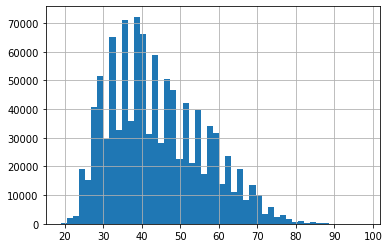

In [5]:
data[data['Edad']<100]['Edad'].hist(bins=50)

In [6]:
data['Edad'].describe()

count    1.048572e+06
mean     4.410601e+01
std      1.234055e+01
min      1.900000e+01
25%      3.500000e+01
50%      4.200000e+01
75%      5.300000e+01
max      9.990000e+02
Name: Edad, dtype: float64

In [7]:
data[(data['Edad']>53)&(data['Edad']<100)]

,Customer_ID,SKU,DiaCompra,Monto_Venta,Cuotas,Edad,NSE,Genero,LocalCompra,JerarquiaCompra,JerarquiaCompra2,MarcaCompra
1,ID_001235,12542056,01/02/2019,11.06,2,65,C,F,San Borja,J14-ESTACIONAL,J1402-NAVIDAD,MICA
2,ID_001236,12542081,01/02/2019,9.48,1,72,A,M,Surquillo,J14-ESTACIONAL,J1402-NAVIDAD,MICA
9,ID_001242,11761147,01/02/2019,7.73,1,73,B,M,San Miguel,J15-BASICOS DECOHOGAR,J1504-COMEDOR,MICA
11,ID_001244,12343622,01/02/2019,67.50,1,66,A,F,San Borja,J09-NINOS,J0909-JUGUETERIA,LITTLEST PET SHOP
14,ID_001246,12616272,01/02/2019,27.09,2,55,D,F,San Miguel,J15-BASICOS DECOHOGAR,J1503-COCINA,MICA
...,...,...,...,...,...,...,...,...,...,...,...,...
1048550,ID_085168,13013451,12/06/2019,59.50,1,73,B,F,Santa Anita,J09-NINOS,J0909-JUGUETERIA,LOKO TOYS
1048561,ID_310339,880046099,12/06/2019,74.50,1,57,C,F,Santa Anita,J07-ACCESORIOS MUJER,J0701-CARTERAS,ELLE
1048564,ID_210142,880064906,12/06/2019,24.95,1,57,A,F,Santa Anita,J04-DAMAS,J0401-TOPS SENORAS,NEWPORT
1048565,ID_230853,13336755,12/06/2019,34.50,1,66,C,M,Santa Anita,J05-RINCON JUVENIL DAMAS,J0501-DENIM,SYBILLA


In [8]:
data[data['Edad']>100]

,Customer_ID,SKU,DiaCompra,Monto_Venta,Cuotas,Edad,NSE,Genero,LocalCompra,JerarquiaCompra,JerarquiaCompra2,MarcaCompra
34181,ID_027059,12033312,1/16/2019,244.30,1,999,A,M,San Isidro,J01-HOMBRES,J0104-BOTTOMS SPORT,NEWPORT
426013,ID_027059,880021104,5/30/2019,34.50,1,999,A,M,San Isidro,J01-HOMBRES,J0108-CAMISERIA,NEWPORT
426014,ID_027059,880025230,5/30/2019,34.50,1,999,A,M,San Isidro,J01-HOMBRES,J0108-CAMISERIA,NEWPORT
1029605,ID_027059,13344896,12/05/2019,949.05,1,999,A,M,San Isidro,J11-ELECTROHOGAR,J1103-FOTOGRAFIA,CANON


<AxesSubplot:>

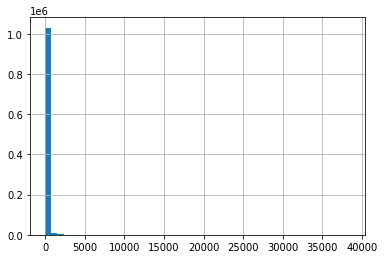

In [9]:
data['Monto_Venta'].hist(bins=50)

In [10]:
data['Monto_Venta'].describe()

count    1.048572e+06
mean     8.866196e+01
std      2.593784e+02
min      1.000000e-02
25%      1.990000e+01
50%      3.990000e+01
75%      7.794000e+01
max      3.845400e+04
Name: Monto_Venta, dtype: float64

In [11]:
data[data['Monto_Venta']>10000]

,Customer_ID,SKU,DiaCompra,Monto_Venta,Cuotas,Edad,NSE,Genero,LocalCompra,JerarquiaCompra,JerarquiaCompra2,MarcaCompra
8844,ID_008357,10540477,01/05/2019,11644.32,1,45,A,F,San Isidro,J99-ADMINISTRACION,J9904-TURISMO,SM
61717,ID_045134,12579465,1/28/2019,10200.00,3,34,A,F,San Borja,J11-ELECTROHOGAR,J1101-VIDEO,SAMSUNG
69112,ID_036859,10540477,1/30/2019,10346.78,1,44,A,M,San Isidro,J99-ADMINISTRACION,J9904-TURISMO,SM
96152,ID_063429,10540478,02/09/2019,10260.06,1,31,B,F,Surco,J99-ADMINISTRACION,J9904-TURISMO,SM
138002,ID_080639,10540478,2/23/2019,12193.20,1,54,A,M,San Borja,J99-ADMINISTRACION,J9904-TURISMO,SM
179119,ID_048075,12599792,03/10/2019,17196.00,1,38,A,M,Miraflores,J11-ELECTROHOGAR,J1101-VIDEO,LG ELECTRONICS
198964,ID_061320,10540477,3/19/2019,11096.25,1,55,A,M,Surco,J99-ADMINISTRACION,J9904-TURISMO,SM
207087,ID_090968,10540477,3/23/2019,14300.04,10,56,A,M,San Isidro,J99-ADMINISTRACION,J9904-TURISMO,SM
215653,ID_025001,13015867,3/27/2019,10516.00,1,34,A,M,San Isidro,J11-ELECTROHOGAR,J1104-COMPUTACION,TOSHIBA
539698,ID_140243,10540478,07/02/2019,21440.00,1,57,A,M,San Martin de Porres,J99-ADMINISTRACION,J9904-TURISMO,SM


In [12]:
data['JerarquiaCompra'].value_counts()

J09-NINOS                        248390
J04-DAMAS                        121001
J01-HOMBRES                       90539
J10-CALZADO                       86561
J05-RINCON JUVENIL DAMAS          84895
J02-RINCON JUVENIL HOMBRES        66406
J11-ELECTROHOGAR                  56283
J06-ROPA INTERIOR                 48283
J15-BASICOS DECOHOGAR             41474
J12-BLANCO                        41076
J03-DEPORTES                      31087
J13-DECORACION                    30295
J08-PERFUMERIA                    23765
J07-ACCESORIOS MUJER              23541
J99-ADMINISTRACION                22204
J14-ESTACIONAL                    18196
J16-ENTRETENCION Y PASATIEMPO     14576
Name: JerarquiaCompra, dtype: int64

In [13]:
data['MarcaCompra'].value_counts()

YAMP         97006
MICA         84073
SYBILLA      61714
NEWPORT      52323
BASEMENT     46013
             ...  
GT               1
ARTILUGIA        1
MAXFIRE          1
SMK              1
REPLAY           1
Name: MarcaCompra, Length: 983, dtype: int64

In [14]:
data['LocalCompra'].value_counts()

San Miguel              187258
San Borja               167053
San Isidro              126752
San Martin de Porres    115929
Miraflores              104850
Surquillo                97871
Surco                    95372
Breña                    65426
Callao                   53281
Santa Anita              16001
Tarapoto                  3186
Chiclayo                  2946
Piura                     2805
Cajamarca                 2786
Cuzco                     2385
Tacna                     2238
Trujillo                  1308
Chimbote                  1125
Name: LocalCompra, dtype: int64

In [15]:
data['MarcaCompra'].value_counts()

YAMP         97006
MICA         84073
SYBILLA      61714
NEWPORT      52323
BASEMENT     46013
             ...  
GT               1
ARTILUGIA        1
MAXFIRE          1
SMK              1
REPLAY           1
Name: MarcaCompra, Length: 983, dtype: int64

In [16]:
data['Cuotas'].value_counts()

1     689532
2     177360
3      88064
4      39172
6      21720
5      14191
12      6810
10      3881
8       3578
7       1739
24       712
18       595
9        375
36       343
15       147
13        99
14        61
11        57
16        49
20        48
30        11
17         7
19         4
22         4
33         3
25         2
31         2
32         2
23         2
35         1
28         1
Name: Cuotas, dtype: int64

In [17]:
data['Cuotas'].describe()

count    1.048572e+06
mean     1.791931e+00
std      1.820713e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.600000e+01
Name: Cuotas, dtype: float64

In [18]:
data.groupby(by=['Customer_ID','DiaCompra','MarcaCompra'])['SKU'].count().sort_values(ascending=False)

Customer_ID  DiaCompra   MarcaCompra 
ID_069290    06/08/2019  SM              29
ID_169724    9/17/2019   SM              26
ID_156380    7/16/2019   YAMP            16
ID_002896    4/24/2019   YAMP            16
ID_117229    07/10/2019  YAMP            15
                                         ..
ID_066908    02/10/2019  BASEMENT         1
ID_066909    02/10/2019  SECOND IMAGE     1
             10/23/2019  ADIDAS           1
ID_066910    02/11/2019  DIADORA          1
ID_310341    12/06/2019  SYBILLA          1
Name: SKU, Length: 970809, dtype: int64

In [19]:
data[(data['Customer_ID']=='ID_069290')&(data['DiaCompra']=='06/08/2019')]

,Customer_ID,SKU,DiaCompra,Monto_Venta,Cuotas,Edad,NSE,Genero,LocalCompra,JerarquiaCompra,JerarquiaCompra2,MarcaCompra
453514,ID_069290,11757082,06/08/2019,30.0,1,49,A,F,Miraflores,J99-ADMINISTRACION,J9906-PROMOCIONES,SM
453515,ID_069290,11757082,06/08/2019,30.0,1,49,A,F,Miraflores,J99-ADMINISTRACION,J9906-PROMOCIONES,SM
453516,ID_069290,11757082,06/08/2019,30.0,1,49,A,F,Miraflores,J99-ADMINISTRACION,J9906-PROMOCIONES,SM
453517,ID_069290,11757082,06/08/2019,30.0,1,49,A,F,Miraflores,J99-ADMINISTRACION,J9906-PROMOCIONES,SM
453518,ID_069290,11757082,06/08/2019,30.0,1,49,A,F,Miraflores,J99-ADMINISTRACION,J9906-PROMOCIONES,SM
453519,ID_069290,11757082,06/08/2019,30.0,1,49,A,F,Miraflores,J99-ADMINISTRACION,J9906-PROMOCIONES,SM
453520,ID_069290,11757082,06/08/2019,30.0,1,49,A,F,Miraflores,J99-ADMINISTRACION,J9906-PROMOCIONES,SM
453521,ID_069290,11757082,06/08/2019,30.0,1,49,A,F,Miraflores,J99-ADMINISTRACION,J9906-PROMOCIONES,SM
453522,ID_069290,11757082,06/08/2019,30.0,1,49,A,F,Miraflores,J99-ADMINISTRACION,J9906-PROMOCIONES,SM
453523,ID_069290,11757082,06/08/2019,30.0,1,49,A,F,Miraflores,J99-ADMINISTRACION,J9906-PROMOCIONES,SM


In [20]:
data[(data['Customer_ID']=='ID_169724')&(data['DiaCompra']=='9/17/2019')]

,Customer_ID,SKU,DiaCompra,Monto_Venta,Cuotas,Edad,NSE,Genero,LocalCompra,JerarquiaCompra,JerarquiaCompra2,MarcaCompra
782925,ID_169724,11757082,9/17/2019,30.0,2,51,A,F,Miraflores,J99-ADMINISTRACION,J9906-PROMOCIONES,SM
782926,ID_169724,11757082,9/17/2019,30.0,2,51,A,F,Miraflores,J99-ADMINISTRACION,J9906-PROMOCIONES,SM
782927,ID_169724,11757082,9/17/2019,30.0,2,51,A,F,Miraflores,J99-ADMINISTRACION,J9906-PROMOCIONES,SM
782928,ID_169724,11757082,9/17/2019,30.0,2,51,A,F,Miraflores,J99-ADMINISTRACION,J9906-PROMOCIONES,SM
782929,ID_169724,11757082,9/17/2019,30.0,2,51,A,F,Miraflores,J99-ADMINISTRACION,J9906-PROMOCIONES,SM
782930,ID_169724,11757082,9/17/2019,30.0,2,51,A,F,Miraflores,J99-ADMINISTRACION,J9906-PROMOCIONES,SM
782931,ID_169724,11757082,9/17/2019,30.0,2,51,A,F,Miraflores,J99-ADMINISTRACION,J9906-PROMOCIONES,SM
782932,ID_169724,11757082,9/17/2019,30.0,2,51,A,F,Miraflores,J99-ADMINISTRACION,J9906-PROMOCIONES,SM
782933,ID_169724,11757082,9/17/2019,30.0,2,51,A,F,Miraflores,J99-ADMINISTRACION,J9906-PROMOCIONES,SM
782934,ID_169724,11757082,9/17/2019,30.0,2,51,A,F,Miraflores,J99-ADMINISTRACION,J9906-PROMOCIONES,SM


In [21]:
data.columns

Index(['Customer_ID', 'SKU', 'DiaCompra', 'Monto_Venta', 'Cuotas', 'Edad',
       'NSE', 'Genero', 'LocalCompra', 'JerarquiaCompra', 'JerarquiaCompra2',
       'MarcaCompra'],
      dtype='object')

In [39]:
df = data.groupby(by=['Customer_ID','Edad','NSE', 'Genero', 'SKU',
                        'DiaCompra', 'LocalCompra', 'JerarquiaCompra', 'JerarquiaCompra2','MarcaCompra']).agg(
           {
               "Monto_Venta":['sum','count']
           }
       ).reset_index()
df

Customer_ID Edad NSE Genero        SKU   DiaCompra  LocalCompra  \
                                                                          
0         ID_001234   52   A      F   12111113  01/02/2019        Surco   
1         ID_001234   52   A      F   12145751   7/31/2019        Surco   
2         ID_001234   52   A      F   12542063  01/02/2019        Surco   
3         ID_001234   52   A      F   12555804  01/02/2019        Surco   
4         ID_001234   52   A      F   12865832   9/13/2019   San Isidro   
...             ...  ...  ..    ...        ...         ...          ...   
1037039   ID_310338   28   C      F   13181532  12/06/2019  Santa Anita   
1037040   ID_310339   57   C      F  880046099  12/06/2019  Santa Anita   
1037041   ID_310340   38   A      F   13112409  12/06/2019  Santa Anita   
1037042   ID_310340   38   A      F  880045039  12/06/2019  Santa Anita   
1037043   ID_310341   48   C      F   13074586  12/06/2019  Santa Anita   

                  JerarquiaCompra          JerarquiaCompra2 MarcaCompra  \
                                                                          
0                  J14-ESTACIONAL             J1402-NAVIDAD        MICA   
1                J11-ELECTROHOGAR  J1111-GARANTIA EXTENDIDA          SM   
2                  J14-ESTACIONAL             J1402-NAVIDAD        MICA   
3                  J14-ESTACIONAL             J1402-NAVIDAD        MICA   
4                       J04-DAMAS                 J0413-MNG         MNG   
...                           ...                       ...         ...   
1037039                 J04-DAMAS     J0406-TOPS DAMA JOVEN    BASEMENT   
1037040      J07-ACCESORIOS MUJER            J0701-CARTERAS        ELLE   
1037041  J05-RINCON JUVENIL DAMAS                J0503-TOPS     MOSSIMO   
1037042  J05-RINCON JUVENIL DAMAS             J0504-SWEATER     MOSSIMO   
1037043  J05-RINCON JUVENIL DAMAS             J0502-BOTTOMS     SYBILLA   

        Monto_Venta        
                sum count  
0              2.50     1  
1             55.00     1  
2              1.58     1  
3              7.54     1  
4             39.90     1  
...             ...   ...  
1037039       69.30     1  
1037040       74.50     1  
1037041       39.50     1  
1037042       39.90     1  
1037043       29.90     1  

[1037044 rows x 12 columns]

In [40]:
df.columns = ['_'.join(col) for col in df.columns]
df = df[['Customer_ID_', 'Edad_', 'NSE_', 'Genero_', 'SKU_', 'Monto_Venta_count', 'Monto_Venta_sum','DiaCompra_',
            'LocalCompra_', 'JerarquiaCompra_', 'JerarquiaCompra2_', 'MarcaCompra_']]
df.columns = ['Customer_ID', 'Edad', 'NSE', 'Genero', 'SKU', 'Cantidad', 'Monto_Venta','DiaCompra',
                'LocalCompra', 'JerarquiaCompra', 'JerarquiaCompra2', 'MarcaCompra']

In [41]:
df

,Customer_ID,Edad,NSE,Genero,SKU,Cantidad,Monto_Venta,DiaCompra,LocalCompra,JerarquiaCompra,JerarquiaCompra2,MarcaCompra
0,ID_001234,52,A,F,12111113,1,2.50,01/02/2019,Surco,J14-ESTACIONAL,J1402-NAVIDAD,MICA
1,ID_001234,52,A,F,12145751,1,55.00,7/31/2019,Surco,J11-ELECTROHOGAR,J1111-GARANTIA EXTENDIDA,SM
2,ID_001234,52,A,F,12542063,1,1.58,01/02/2019,Surco,J14-ESTACIONAL,J1402-NAVIDAD,MICA
3,ID_001234,52,A,F,12555804,1,7.54,01/02/2019,Surco,J14-ESTACIONAL,J1402-NAVIDAD,MICA
4,ID_001234,52,A,F,12865832,1,39.90,9/13/2019,San Isidro,J04-DAMAS,J0413-MNG,MNG
...,...,...,...,...,...,...,...,...,...,...,...,...
1037039,ID_310338,28,C,F,13181532,1,69.30,12/06/2019,Santa Anita,J04-DAMAS,J0406-TOPS DAMA JOVEN,BASEMENT
1037040,ID_310339,57,C,F,880046099,1,74.50,12/06/2019,Santa Anita,J07-ACCESORIOS MUJER,J0701-CARTERAS,ELLE
1037041,ID_310340,38,A,F,13112409,1,39.50,12/06/2019,Santa Anita,J05-RINCON JUVENIL DAMAS,J0503-TOPS,MOSSIMO
1037042,ID_310340,38,A,F,880045039,1,39.90,12/06/2019,Santa Anita,J05-RINCON JUVENIL DAMAS,J0504-SWEATER,MOSSIMO


In [42]:
df['Edad'].quantile(0.2),df['Edad'].quantile(0.4),df['Edad'].quantile(0.6),df['Edad'].quantile(0.8)

(33.0, 39.0, 46.0, 55.0)

In [43]:
bins = [18,25,35,50,65,999]
labels = ['Adolescente','Adulto Joven','Adulto','Adulto Mayor','Anciano']
df['Edad_Category'] = pd.cut(df.Edad, bins=bins,labels=labels)

<ipython-input-43-f65367bb0ff8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Edad_Category'] = pd.cut(df.Edad, bins=bins,labels=labels)


In [44]:
df['Edad_Category'].value_counts()

Adulto          443861
Adulto Joven    266792
Adulto Mayor    241942
Anciano          60478
Adolescente      23971
Name: Edad_Category, dtype: int64

In [45]:
df[df['DiaCompra']=='2/29/2019']

,Customer_ID,Edad,NSE,Genero,SKU,Cantidad,Monto_Venta,DiaCompra,LocalCompra,JerarquiaCompra,JerarquiaCompra2,MarcaCompra,Edad_Category
551,ID_001308,37,A,F,12336451,1,23.92,2/29/2019,Surco,J09-NINOS,J0907-ROPA INTERIOR,TOY STORY,Adulto
629,ID_001317,37,B,F,12471636,1,39.90,2/29/2019,San Isidro,J01-HOMBRES,J0105-TOPS SPORT,NEWPORT,Adulto
782,ID_001343,46,A,M,12647132,1,31.92,2/29/2019,San Borja,J04-DAMAS,J0407-BOTTOMS DAMA JOVEN,BASEMENT,Adulto
818,ID_001346,50,A,M,12583935,1,22.41,2/29/2019,Surco,J05-RINCON JUVENIL DAMAS,J0503-TOPS,DENIMLAB,Adulto
1151,ID_001399,47,A,M,12795978,1,29.90,2/29/2019,Surquillo,J09-NINOS,J0910-COLEGIAL,BARBIE,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483131,ID_094386,26,C,M,12505275,1,22.41,2/29/2019,Cajamarca,J02-RINCON JUVENIL HOMBRES,J0203-TOPS RINCON JUVENIL,MOSSIMO,Adulto Joven
483132,ID_094387,29,A,M,12449388,1,149.00,2/29/2019,Cajamarca,J02-RINCON JUVENIL HOMBRES,J0201-DENIM RINCON JUVENIL,UFO,Adulto Joven
483133,ID_094387,29,A,M,12632576,1,139.00,2/29/2019,Cajamarca,J03-DEPORTES,J0301-VESTUARIO HOMBRE,ADIDAS,Adulto Joven
483142,ID_094388,54,B,F,12386797,1,22.41,2/29/2019,Cajamarca,J02-RINCON JUVENIL HOMBRES,J0202-BOTTOMS RINCON JUVENIL,SECOND IMAGE,Adulto Mayor


In [46]:
# Corregimos porque 2019 no es bisiesto:

df['DiaCompra'] = np.where(df['DiaCompra']=='2/29/2019','2/28/2019',df['DiaCompra'])

<ipython-input-46-2757c3439de0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DiaCompra'] = np.where(df['DiaCompra']=='2/29/2019','2/28/2019',df['DiaCompra'])


## Analisis RFM

### Analisis de Retención de Clientes (%) 

In [47]:
# Convertir DiaCompra a datetime
df['DiaCompra'] = pd.to_datetime(df['DiaCompra'],errors='coerce')

<ipython-input-47-9838ab8b3b99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DiaCompra'] = pd.to_datetime(df['DiaCompra'],errors='coerce')


In [48]:
df[df['DiaCompra'].isna()]

,Customer_ID,Edad,NSE,Genero,SKU,Cantidad,Monto_Venta,DiaCompra,LocalCompra,JerarquiaCompra,JerarquiaCompra2,MarcaCompra,Edad_Category


In [49]:
df

,Customer_ID,Edad,NSE,Genero,SKU,Cantidad,Monto_Venta,DiaCompra,LocalCompra,JerarquiaCompra,JerarquiaCompra2,MarcaCompra,Edad_Category
0,ID_001234,52,A,F,12111113,1,2.50,2019-01-02,Surco,J14-ESTACIONAL,J1402-NAVIDAD,MICA,Adulto Mayor
1,ID_001234,52,A,F,12145751,1,55.00,2019-07-31,Surco,J11-ELECTROHOGAR,J1111-GARANTIA EXTENDIDA,SM,Adulto Mayor
2,ID_001234,52,A,F,12542063,1,1.58,2019-01-02,Surco,J14-ESTACIONAL,J1402-NAVIDAD,MICA,Adulto Mayor
3,ID_001234,52,A,F,12555804,1,7.54,2019-01-02,Surco,J14-ESTACIONAL,J1402-NAVIDAD,MICA,Adulto Mayor
4,ID_001234,52,A,F,12865832,1,39.90,2019-09-13,San Isidro,J04-DAMAS,J0413-MNG,MNG,Adulto Mayor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037039,ID_310338,28,C,F,13181532,1,69.30,2019-12-06,Santa Anita,J04-DAMAS,J0406-TOPS DAMA JOVEN,BASEMENT,Adulto Joven
1037040,ID_310339,57,C,F,880046099,1,74.50,2019-12-06,Santa Anita,J07-ACCESORIOS MUJER,J0701-CARTERAS,ELLE,Adulto Mayor
1037041,ID_310340,38,A,F,13112409,1,39.50,2019-12-06,Santa Anita,J05-RINCON JUVENIL DAMAS,J0503-TOPS,MOSSIMO,Adulto
1037042,ID_310340,38,A,F,880045039,1,39.90,2019-12-06,Santa Anita,J05-RINCON JUVENIL DAMAS,J0504-SWEATER,MOSSIMO,Adulto


In [50]:
def get_month(x): return dt.datetime(x.year, x.month, 1) 

df['InvoiceMes'] = df['DiaCompra'].apply(get_month)

# Agrupar por CustomerID y Mes
grouping = df.groupby(by=['Customer_ID'])['InvoiceMes'] 

# Usar transform() junto con min() para asignar el menor valor de Mes de cada cliente-local
# CohortMes es el mes de la más reciente adquisición del cliente
df['CohortMes'] = grouping.transform('min')

# Revisar los 5 primeras columnas
df.head()

<ipython-input-50-5c5a8d870c98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMes'] = df['DiaCompra'].apply(get_month)
<ipython-input-50-5c5a8d870c98>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortMes'] = grouping.transform('min')


,Customer_ID,Edad,NSE,Genero,SKU,Cantidad,Monto_Venta,DiaCompra,LocalCompra,JerarquiaCompra,JerarquiaCompra2,MarcaCompra,Edad_Category,InvoiceMes,CohortMes
0,ID_001234,52,A,F,12111113,1,2.50,2019-01-02,Surco,J14-ESTACIONAL,J1402-NAVIDAD,MICA,Adulto Mayor,2019-01-01,2019-01-01
1,ID_001234,52,A,F,12145751,1,55.00,2019-07-31,Surco,J11-ELECTROHOGAR,J1111-GARANTIA EXTENDIDA,SM,Adulto Mayor,2019-07-01,2019-01-01
2,ID_001234,52,A,F,12542063,1,1.58,2019-01-02,Surco,J14-ESTACIONAL,J1402-NAVIDAD,MICA,Adulto Mayor,2019-01-01,2019-01-01
3,ID_001234,52,A,F,12555804,1,7.54,2019-01-02,Surco,J14-ESTACIONAL,J1402-NAVIDAD,MICA,Adulto Mayor,2019-01-01,2019-01-01
4,ID_001234,52,A,F,12865832,1,39.90,2019-09-13,San Isidro,J04-DAMAS,J0413-MNG,MNG,Adulto Mayor,2019-09-01,2019-01-01


In [51]:
# Calcular el desplazamiento de tiempo
# Crear una función para extraer valores enteros en años, meses y días
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Calcular el número de meses entre la primera y última transacción/adquisición por cada cliente
invoice_year, invoice_month, _ = get_date_int(df, 'InvoiceMes')
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMes')

# Calcular la diferencia en años
years_diff = invoice_year - cohort_year

# Calcular la diferencia en meses
months_diff = invoice_month - cohort_month

# Convertir CohortMonth a formate 'date'
df['CohortMes'] = pd.to_datetime(df['CohortMes']).dt.date

# Extraer la diferencia en meses desde la primera transacción/adquisión por cliente
df['CohortIndex'] = years_diff * 12 + months_diff
df.head()

<ipython-input-51-43934565756a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortMes'] = pd.to_datetime(df['CohortMes']).dt.date
<ipython-input-51-43934565756a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortIndex'] = years_diff * 12 + months_diff


,Customer_ID,Edad,NSE,Genero,SKU,Cantidad,Monto_Venta,DiaCompra,LocalCompra,JerarquiaCompra,JerarquiaCompra2,MarcaCompra,Edad_Category,InvoiceMes,CohortMes,CohortIndex
0,ID_001234,52,A,F,12111113,1,2.50,2019-01-02,Surco,J14-ESTACIONAL,J1402-NAVIDAD,MICA,Adulto Mayor,2019-01-01,2019-01-01,0
1,ID_001234,52,A,F,12145751,1,55.00,2019-07-31,Surco,J11-ELECTROHOGAR,J1111-GARANTIA EXTENDIDA,SM,Adulto Mayor,2019-07-01,2019-01-01,6
2,ID_001234,52,A,F,12542063,1,1.58,2019-01-02,Surco,J14-ESTACIONAL,J1402-NAVIDAD,MICA,Adulto Mayor,2019-01-01,2019-01-01,0
3,ID_001234,52,A,F,12555804,1,7.54,2019-01-02,Surco,J14-ESTACIONAL,J1402-NAVIDAD,MICA,Adulto Mayor,2019-01-01,2019-01-01,0
4,ID_001234,52,A,F,12865832,1,39.90,2019-09-13,San Isidro,J04-DAMAS,J0413-MNG,MNG,Adulto Mayor,2019-09-01,2019-01-01,8


In [52]:
# Crear DataFrame grouping para agrupar datos basados en CohortMes y CohortIndex
grouping = df.groupby(['CohortMes', 'CohortIndex'])

# Contar el número de valores únicos por CustomerID
cohort_data = grouping['Customer_ID'].apply(pd.Series.nunique).reset_index()

# Crear tabla pivote
cohort_counts = cohort_data.pivot(index='CohortMes', columns='CohortIndex', values='Customer_ID')
cohort_counts

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11
CohortMes,,,,,,,,,,,,
2019-01-01,49666.0,12096.0,10772.0,11036.0,14514.0,13399.0,13367.0,11824.0,9437.0,10041.0,12376.0,5314.0
2019-02-01,43470.0,8436.0,8385.0,11090.0,10461.0,10629.0,9268.0,7204.0,7584.0,9567.0,3924.0,NaN
2019-03-01,31194.0,5645.0,7332.0,6960.0,6876.0,5902.0,4699.0,4991.0,6139.0,2656.0,NaN,NaN
2019-04-01,29115.0,6384.0,5812.0,5766.0,4841.0,3928.0,4270.0,5374.0,2205.0,NaN,NaN,NaN
2019-05-01,35509.0,6803.0,6604.0,5458.0,4407.0,4722.0,6099.0,2549.0,NaN,NaN,NaN,NaN
2019-06-01,27867.0,4919.0,4108.0,3239.0,3368.0,4345.0,1695.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,25959.0,3522.0,2713.0,2992.0,3563.0,1500.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,18409.0,1942.0,2148.0,2595.0,1040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,12877.0,1531.0,1791.0,705.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Seleccionar la primera columna y guardarlo como cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Dividir cohort_counts por cohort_sizes en todas las filas
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3)*100

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11
CohortMes,,,,,,,,,,,,
2019-01-01,100.0,24.4,21.7,22.2,29.2,27.0,26.9,23.8,19.0,20.2,24.9,10.7
2019-02-01,100.0,19.4,19.3,25.5,24.1,24.5,21.3,16.6,17.4,22.0,9.0,NaN
2019-03-01,100.0,18.1,23.5,22.3,22.0,18.9,15.1,16.0,19.7,8.5,NaN,NaN
2019-04-01,100.0,21.9,20.0,19.8,16.6,13.5,14.7,18.5,7.6,NaN,NaN,NaN
2019-05-01,100.0,19.2,18.6,15.4,12.4,13.3,17.2,7.2,NaN,NaN,NaN,NaN
2019-06-01,100.0,17.7,14.7,11.6,12.1,15.6,6.1,NaN,NaN,NaN,NaN,NaN
2019-07-01,100.0,13.6,10.5,11.5,13.7,5.8,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,100.0,10.5,11.7,14.1,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,100.0,11.9,13.9,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


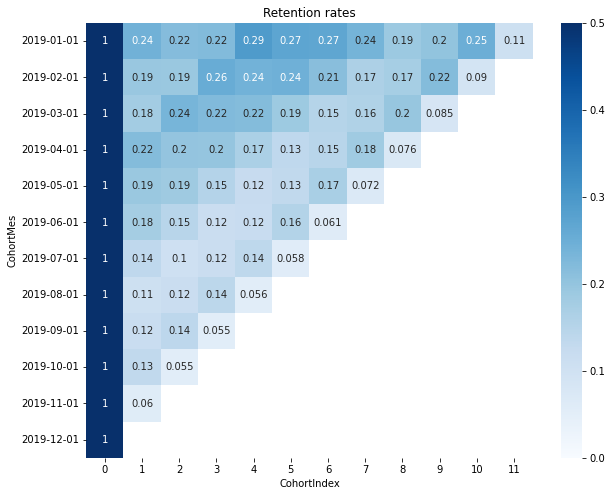

In [54]:
plt.figure(figsize=(10,8))
plt.title('Retention rates')
sns.heatmap(data = retention,
            annot = True,
            vmin = 0.0,
            vmax = 0.5,
            cmap = 'Blues')
plt.show()

### Segmentación RFM - basado en cliente, local y jerarquia de compra

In [56]:
df.drop(['InvoiceMes','CohortMes','CohortIndex'],axis=1, inplace=True)

<ipython-input-56-0bf6646694ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['InvoiceMes','CohortMes','CohortIndex'],axis=1, inplace=True)


In [57]:
df

,Customer_ID,Edad,NSE,Genero,SKU,Cantidad,Monto_Venta,DiaCompra,LocalCompra,JerarquiaCompra,JerarquiaCompra2,MarcaCompra,Edad_Category
0,ID_001234,52,A,F,12111113,1,2.50,2019-01-02,Surco,J14-ESTACIONAL,J1402-NAVIDAD,MICA,Adulto Mayor
1,ID_001234,52,A,F,12145751,1,55.00,2019-07-31,Surco,J11-ELECTROHOGAR,J1111-GARANTIA EXTENDIDA,SM,Adulto Mayor
2,ID_001234,52,A,F,12542063,1,1.58,2019-01-02,Surco,J14-ESTACIONAL,J1402-NAVIDAD,MICA,Adulto Mayor
3,ID_001234,52,A,F,12555804,1,7.54,2019-01-02,Surco,J14-ESTACIONAL,J1402-NAVIDAD,MICA,Adulto Mayor
4,ID_001234,52,A,F,12865832,1,39.90,2019-09-13,San Isidro,J04-DAMAS,J0413-MNG,MNG,Adulto Mayor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037039,ID_310338,28,C,F,13181532,1,69.30,2019-12-06,Santa Anita,J04-DAMAS,J0406-TOPS DAMA JOVEN,BASEMENT,Adulto Joven
1037040,ID_310339,57,C,F,880046099,1,74.50,2019-12-06,Santa Anita,J07-ACCESORIOS MUJER,J0701-CARTERAS,ELLE,Adulto Mayor
1037041,ID_310340,38,A,F,13112409,1,39.50,2019-12-06,Santa Anita,J05-RINCON JUVENIL DAMAS,J0503-TOPS,MOSSIMO,Adulto
1037042,ID_310340,38,A,F,880045039,1,39.90,2019-12-06,Santa Anita,J05-RINCON JUVENIL DAMAS,J0504-SWEATER,MOSSIMO,Adulto


In [60]:
# Crear snapshot_date para seleccionar la fecha más reciente de todo el dataset, sumar 1 para simular que es el 
# día que hacemos el análisis
snapshot_date = max(df.DiaCompra) + dt.timedelta(days=1)

# Agrupar los datos por Customer_ID
group = df.groupby(['Customer_ID','LocalCompra','JerarquiaCompra']).agg({
    'DiaCompra': lambda x: (snapshot_date - x.max()).days, 
    'SKU': 'count',
    'Monto_Venta': 'sum'}).reset_index()

# Renombar columnas para una fácil interpretación
group.rename(columns = {'DiaCompra': 'Recency',
                        'SKU': 'Frequency',
                        'Monto_Venta': 'MonetaryValue'}, inplace=True)

# Datamart es una tabla donde las filas son cada cliente con su antiguedad, frecuencia y valor monetario al 
# día de hoy.            
group.head()

,Customer_ID,LocalCompra,JerarquiaCompra,Recency,Frequency,MonetaryValue
0,ID_001234,San Borja,J11-ELECTROHOGAR,68,1,2470.00
1,ID_001234,San Borja,J14-ESTACIONAL,12,1,12.14
2,ID_001234,San Isidro,J04-DAMAS,85,1,39.90
3,ID_001234,Surco,J11-ELECTROHOGAR,129,1,55.00
4,ID_001234,Surco,J14-ESTACIONAL,339,3,11.62


In [63]:
group[group['Frequency']>5]

,Customer_ID,LocalCompra,JerarquiaCompra,Recency,Frequency,MonetaryValue
56,ID_001244,San Borja,J09-NINOS,74,8,169.61
177,ID_001264,San Miguel,J04-DAMAS,29,6,260.84
208,ID_001272,San Isidro,J04-DAMAS,21,7,628.64
209,ID_001272,San Isidro,J06-ROPA INTERIOR,53,13,350.08
213,ID_001272,San Isidro,J12-BLANCO,270,7,414.76
...,...,...,...,...,...,...
771965,ID_300916,Surquillo,J09-NINOS,13,6,235.45
775269,ID_303704,Surco,J14-ESTACIONAL,7,8,101.80
777483,ID_305592,Santa Anita,J14-ESTACIONAL,5,6,14.10
780149,ID_307903,San Borja,J14-ESTACIONAL,1,6,182.71


In [65]:
group[group['Frequency']>100]

,Customer_ID,LocalCompra,JerarquiaCompra,Recency,Frequency,MonetaryValue
6671,ID_002896,San Borja,J09-NINOS,44,278,2638.30
59624,ID_015919,San Miguel,J09-NINOS,34,190,1079.62


In [66]:
group['Recency'].describe()

count    783008.000000
mean        154.150322
std          96.728947
min           1.000000
25%          69.000000
50%         152.000000
75%         228.000000
max         339.000000
Name: Recency, dtype: float64

<AxesSubplot:>

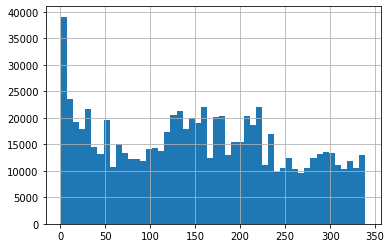

In [68]:
group['Recency'].hist(bins=50)

In [69]:
group['MonetaryValue'].describe()

count    783008.000000
mean        118.732438
std         331.502537
min           0.010000
25%          25.450000
50%          49.900000
75%          99.440000
max       58102.350000
Name: MonetaryValue, dtype: float64

<AxesSubplot:>

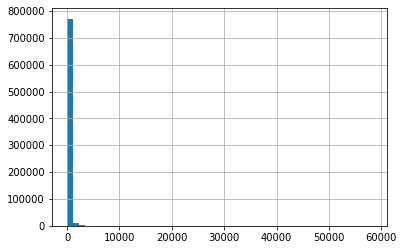

In [71]:
group['MonetaryValue'].hist(bins=50)

In [72]:
group['Frequency'].describe()

count    783008.000000
mean          1.324436
std           0.994031
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         278.000000
Name: Frequency, dtype: float64

<AxesSubplot:>

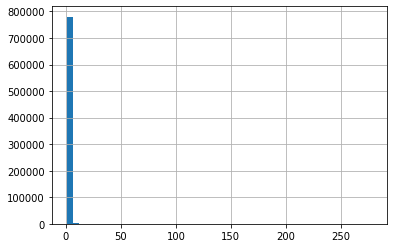

In [73]:
group['Frequency'].hist(bins=50)

In [78]:
group[group['Frequency']>2]['Frequency'].describe()

count    49378.000000
mean         3.903216
std          2.582203
min          3.000000
25%          3.000000
50%          3.000000
75%          4.000000
max        278.000000
Name: Frequency, dtype: float64

<AxesSubplot:>

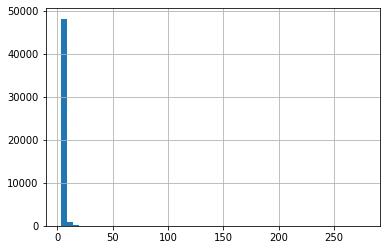

In [79]:
group[group['Frequency']>2]['Frequency'].hist(bins=50)

In [81]:
# Crear etiquetas para Recency, Frequency y MonetaryValures
r_labels = range(4, 0, -1) 
m_labels = range(1, 5)

bins = [0,1,2,3,4,278]
f_labels = [1,2,3,4,5]

# Asignar esas etiquetas a 04 grupos de percentiles de igual tamaño
r_groups = pd.qcut(group['Recency'], q=4, labels=r_labels)
f_groups = pd.cut(group['Frequency'], bins=bins,labels=f_labels)        
m_groups = pd.qcut(group['MonetaryValue'], q=4, labels=m_labels)

In [85]:
# Crear nuevas columnas R, F y M en Group
group = group.assign(R=r_groups.values, F=f_groups.values, M= m_groups.values)
group

,Customer_ID,LocalCompra,JerarquiaCompra,Recency,Frequency,MonetaryValue,R,F,M
0,ID_001234,San Borja,J11-ELECTROHOGAR,68,1,2470.00,4,1,4
1,ID_001234,San Borja,J14-ESTACIONAL,12,1,12.14,4,1,1
2,ID_001234,San Isidro,J04-DAMAS,85,1,39.90,3,1,2
3,ID_001234,Surco,J11-ELECTROHOGAR,129,1,55.00,3,1,3
4,ID_001234,Surco,J14-ESTACIONAL,339,3,11.62,1,3,1
...,...,...,...,...,...,...,...,...,...
783003,ID_310337,Santa Anita,J07-ACCESORIOS MUJER,1,1,49.50,4,1,2
783004,ID_310338,Santa Anita,J04-DAMAS,1,1,69.30,4,1,3
783005,ID_310339,Santa Anita,J07-ACCESORIOS MUJER,1,1,74.50,4,1,3
783006,ID_310340,Santa Anita,J05-RINCON JUVENIL DAMAS,1,2,79.40,4,2,3


In [92]:
# Convertir columnas a formato 'int' y concatenar los quartiles de RFM en columna RFM_Segment
def join_rfm(x): 
    return f"{x['R']}{x['F']}{x['M']}"

group['RFM_Segment'] = group.apply(join_rfm, axis=1)

# Calcular RFM_Score
group['RFM_Score'] = group[['R','F','M']].sum(axis=1)

group.head()

,Customer_ID,LocalCompra,JerarquiaCompra,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
0,ID_001234,San Borja,J11-ELECTROHOGAR,68,1,2470.00,4,1,4,414,9
1,ID_001234,San Borja,J14-ESTACIONAL,12,1,12.14,4,1,1,411,6
2,ID_001234,San Isidro,J04-DAMAS,85,1,39.90,3,1,2,312,6
3,ID_001234,Surco,J11-ELECTROHOGAR,129,1,55.00,3,1,3,313,7
4,ID_001234,Surco,J14-ESTACIONAL,339,3,11.62,1,3,1,131,5


In [93]:
# Group RFM_Segment
group.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
111    57673
212    51792
411    47091
112    45744
312    44806
311    42582
412    40706
213    39936
211    36423
113    36307
dtype: int64

In [94]:
group.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue       
               mean      mean          mean  count
RFM_Segment                                       
111           284.5       1.0          14.0  57673
112           285.1       1.0          37.6  45744
113           282.2       1.0          74.2  36307
114           280.0       1.0         405.5  30183
121           281.1       2.0          15.1   2886
...             ...       ...           ...    ...
444            26.4       4.0         266.1   3630
451            19.2       5.5          17.8     39
452            24.0       5.6          38.2     86
453            28.5       5.6          80.2    438
454            23.6       7.1         402.5   5023

[80 rows x 4 columns]

In [95]:
group.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue        
             mean      mean          mean   count
RFM_Score                                        
3           284.5       1.0          14.0   57673
4           245.4       1.0          27.1   85053
5           193.9       1.1          40.4  137292
6           146.1       1.1         104.3  174463
7           120.4       1.2         140.5  133086
8            96.7       1.4         203.7   91678
9            68.4       1.7         278.2   56564
10           60.2       2.6         261.9   24902
11           55.9       3.6         247.3   11298
12           53.1       4.9         278.8    5976
13           23.6       7.1         402.5    5023

In [96]:
def segment_me(df):
    if df['RFM_Score'] >= 10:
        return 'Gold'
    elif df['RFM_Score'] >= 6:
        return 'Silver'
    else:
        return 'Bronze'

group['General_Segment'] = group.apply(segment_me, axis=1)
group.head() 

,Customer_ID,LocalCompra,JerarquiaCompra,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
0,ID_001234,San Borja,J11-ELECTROHOGAR,68,1,2470.00,4,1,4,414,9,Silver
1,ID_001234,San Borja,J14-ESTACIONAL,12,1,12.14,4,1,1,411,6,Silver
2,ID_001234,San Isidro,J04-DAMAS,85,1,39.90,3,1,2,312,6,Silver
3,ID_001234,Surco,J11-ELECTROHOGAR,129,1,55.00,3,1,3,313,7,Silver
4,ID_001234,Surco,J14-ESTACIONAL,339,3,11.62,1,3,1,131,5,Bronze


In [97]:
group.groupby('General_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue        
                   mean      mean          mean   count
General_Segment                                        
Bronze            228.2       1.0          30.9  280018
Gold               54.4       3.6         275.5   47199
Silver            119.0       1.3         156.4  455791

#### Explore cases data with frequency of 1

In [106]:
group[group['Frequency']==1]['General_Segment'].value_counts()

Silver    352428
Bronze    270521
Name: General_Segment, dtype: int64

### Clustering

#### Encontrar numero optimo de clusters

In [98]:
group_rfm = group[['Recency', 'Frequency', 'MonetaryValue']]
group_rfm.describe()

,Recency,Frequency,MonetaryValue
count,783008.000000,783008.000000,783008.000000
mean,154.150322,1.324436,118.732438
std,96.728947,0.994031,331.502537
min,1.000000,1.000000,0.010000
25%,69.000000,1.000000,25.450000
50%,152.000000,1.000000,49.900000
75%,228.000000,1.000000,99.440000
max,339.000000,278.000000,58102.350000


/home/bruno/miniconda3/envs/bru_ds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/bruno/miniconda3/envs/bru_ds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/bruno/miniconda3/envs/bru_ds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

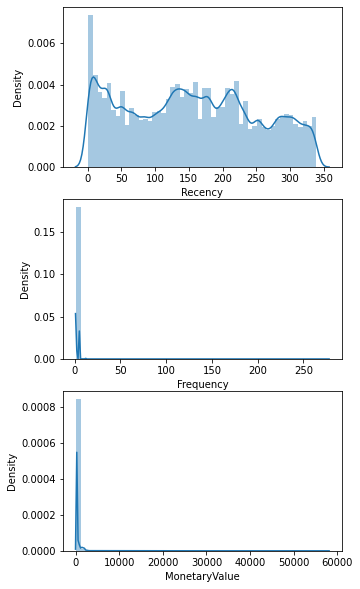

In [99]:
# Graficar la distribución de las columnas Recency, Frequency y MonetaryValue
plt.figure(figsize=(5,10))
plt.subplot(3, 1, 1)
sns.distplot(group_rfm['Recency'])
plt.subplot(3, 1, 2)
sns.distplot(group_rfm['Frequency'])
plt.subplot(3, 1, 3)
sns.distplot(group_rfm['MonetaryValue'])
plt.show()

In [103]:
transform_group_rfm = group_rfm.copy()
transform_group_rfm['Frequency'] = np.sqrt(transform_group_rfm['Frequency'])
transform_group_rfm['MonetaryValue'] = np.log(transform_group_rfm['MonetaryValue'])
transform_group_rfm.describe()

,Recency,Frequency,MonetaryValue
count,783008.000000,783008.000000,783008.000000
mean,154.150322,1.117776,3.955114
std,96.728947,0.273883,1.170689
min,1.000000,1.000000,-4.605170
25%,69.000000,1.000000,3.236716
50%,152.000000,1.000000,3.910021
75%,228.000000,1.000000,4.599554
max,339.000000,16.673332,10.969961


/home/bruno/miniconda3/envs/bru_ds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/bruno/miniconda3/envs/bru_ds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/bruno/miniconda3/envs/bru_ds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

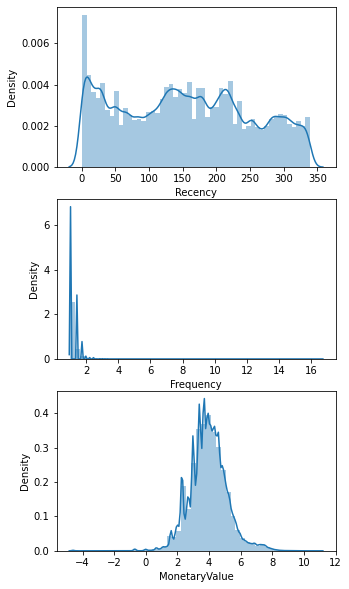

In [104]:
plt.figure(figsize=(5,10))
plt.subplot(3, 1, 1)
sns.distplot(transform_group_rfm['Recency'])
plt.subplot(3, 1, 2)
sns.distplot(transform_group_rfm['Frequency'])
plt.subplot(3, 1, 3)
sns.distplot(transform_group_rfm['MonetaryValue'])
plt.show()

In [110]:
scaler = StandardScaler()

scaler.fit(transform_group_rfm)

transform_group_rfm_normalized = scaler.transform(transform_group_rfm)

transform_group_rfm_normalized = pd.DataFrame(transform_group_rfm_normalized,
 index=transform_group_rfm.index, columns=transform_group_rfm.columns)

transform_group_rfm_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,783008.00,783008.00,783008.00
mean,-0.00,0.00,-0.00
std,1.00,1.00,1.00
min,-1.58,-0.43,-7.31
25%,-0.88,-0.43,-0.61
50%,-0.02,-0.43,-0.04
75%,0.76,-0.43,0.55
max,1.91,56.80,5.99


/home/bruno/miniconda3/envs/bru_ds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/bruno/miniconda3/envs/bru_ds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/bruno/miniconda3/envs/bru_ds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

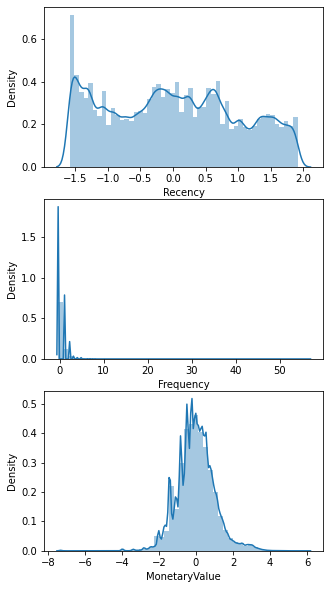

In [111]:
plt.figure(figsize=(5,10))
plt.subplot(3, 1, 1)
sns.distplot(transform_group_rfm_normalized['Recency'])
plt.subplot(3, 1, 2)
sns.distplot(transform_group_rfm_normalized['Frequency'])
plt.subplot(3, 1, 3)
sns.distplot(transform_group_rfm_normalized['MonetaryValue'])
plt.show()

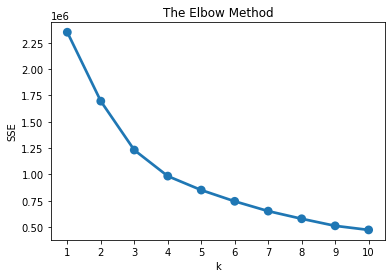

In [112]:
# Entrenar el KMeans y calcular el SSE para cada *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(transform_group_rfm_normalized)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center

# Graficar SSE para cada *k*
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

**El método del codo indica que un numero optimo de clusters se encuentra entre 3 y 4 cluster** 

In [114]:
kmeans = KMeans(n_clusters=4, random_state=1)

kmeans.fit(transform_group_rfm_normalized)

cluster_labels = kmeans.labels_

#### Analisis de Clusters

In [115]:
group_rfm_k4 = group_rfm.assign(Cluster = cluster_labels)

# Calcular el promedio de los valores RFM
# y la cantidad de clientes por cada cluster
group_rfm_k4.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(0)

Recency Frequency MonetaryValue        
           mean      mean          mean   count
Cluster                                        
0          74.0       1.0          36.0  248035
1         106.0       3.0         178.0  131815
2         255.0       1.0          39.0  247027
3         163.0       1.0         327.0  156131

In [116]:
transform_group_rfm_normalized

,Recency,Frequency,MonetaryValue
0,-0.890637,-0.430025,3.294523
1,-1.469575,-0.430025,-1.245941
2,-0.714888,-0.430025,-0.229555
3,-0.260008,-0.430025,0.044605
4,1.911008,2.242835,-1.283336
...,...,...,...
783003,-1.583295,-0.430025,-0.045393
783004,-1.583295,-0.430025,0.242021
783005,-1.583295,-0.430025,0.303825
783006,-1.583295,1.082350,0.358237


In [119]:
group

,Customer_ID,LocalCompra,JerarquiaCompra,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
0,ID_001234,San Borja,J11-ELECTROHOGAR,68,1,2470.00,4,1,4,414,9,Silver
1,ID_001234,San Borja,J14-ESTACIONAL,12,1,12.14,4,1,1,411,6,Silver
2,ID_001234,San Isidro,J04-DAMAS,85,1,39.90,3,1,2,312,6,Silver
3,ID_001234,Surco,J11-ELECTROHOGAR,129,1,55.00,3,1,3,313,7,Silver
4,ID_001234,Surco,J14-ESTACIONAL,339,3,11.62,1,3,1,131,5,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
783003,ID_310337,Santa Anita,J07-ACCESORIOS MUJER,1,1,49.50,4,1,2,412,7,Silver
783004,ID_310338,Santa Anita,J04-DAMAS,1,1,69.30,4,1,3,413,8,Silver
783005,ID_310339,Santa Anita,J07-ACCESORIOS MUJER,1,1,74.50,4,1,3,413,8,Silver
783006,ID_310340,Santa Anita,J05-RINCON JUVENIL DAMAS,1,2,79.40,4,2,3,423,9,Silver


In [120]:
df_final = pd.DataFrame(transform_group_rfm_normalized,
                                    index=group.index,
                                    columns=group.columns)

df_final['Cluster'] = group_rfm_k4['Cluster']


melt = pd.melt(df_final.reset_index(),
                id_vars=['CustomerID','LocalCompra','JerarquiaCompra','Cluster'],
                value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                var_name='Attribute',
                value_name='Value')
melt

KeyError: "The following 'id_vars' are not present in the DataFrame: ['CustomerID']"

In [ ]:
melt = pd.melt(df_final.reset_index(),
                id_vars=['CustomerID','LocalCompra','JerarquiaCompra','Cluster'],
                value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                var_name='Attribute',
                value_name='Value')